<font color=blue> Привет еще раз. Спасибо, что исправил помарки. Теперь мои комментарии выделены синим.
    
---

---
## Комментарий от наставника

Привет! Спасибо, что прислал задание:) В целом, работа производит неплохое впечатление, однако обрати внимание на некоторые мои комментарии. Они обозначены пометкой *Комментарий от наставника*. Пострайся учесть эти комментарии.

---

<font color="green">Привет! Исправил замечания, зеленым шрифтом замечания к замечаниям и исправлениям.</font>

# Определение перспективного тарифа для телеком компании

### Задача:
    
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### План:
1. Изучение общей информации по таблицам.
2. Предобработка данных и подсчет.
3. Анализ данных.
4. Проверка гипотез.
5. Описание проекта и вывод.

### Описание входных данных:
#### Таблицы:
- /datasets/calls.csv
- /datasets/internet.csv
- /datasets/messages.csv
- /datasets/tariffs.csv
- /datasets/users.csv

#### Описание параметров:
Таблица **users** (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица **calls** (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица **messages** (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица **internet** (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица **tariffs** (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

---
## Комментарий от наставника


В работе желательно делать некое вступление, описание самого проекта. Также необходимо приводить краткий план того, что надо сделать(если этот план имеется), а также информацию о входных данных: какие столбцы есть в таблице, их названия и какую информацию они несут (см. пример). Так работа выглядит презентабельно.

<font color=red> Пример: </font>
---
Описание данных: 
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- ...    
    
---

<font color="green">Исправлено</font>

### Шаг 1. 

Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

calls = pd.read_csv('datasets/calls.csv')
internet = pd.read_csv('datasets/internet.csv')
messages = pd.read_csv('datasets/messages.csv')
tariffs = pd.read_csv('datasets/tariffs.csv')
users = pd.read_csv('datasets/users.csv')

print(calls.info(), '\n')
print(internet.info(), '\n')
print(messages.info(), '\n')
print(tariffs.info(), '\n')
print(users.info())

#### Результаты изучения данных:

В таблице "calls" всего  202607 записей, 5 колонок, пропусков нет.<br>
В таблице "internet" всего 149396 записей, 5 колонок, пропусков нет. <br>
В таблице "messages" всего 123036 записей, 4 колонки, пропусков нет. <br>
В таблице "tariffs" всего 2 записей, 9 колонок, пропусков нет.<br>
В таблице "users" всего 500 записей, 9 колонок, пропуски в колонке "churn_date" (дата прекращения пользования тарифом).<br>
Перед выполнением задачи нужно привести колонки в таблицах к правильному типу данных, проверить данные на адекватность и заполнить пропуски.<br>

###  Шаг 2. Подготовка данных

Предобработка: 
- [x] Привести данные к нужным типам;
- [x] Найти и исправить ошибки в данных.
- [x] Пояснить, какие ошибки найдены и как они исправилены.

Расчеты для каждого пользователя:
- [x] Количество сделанных звонков и израсходованных минут разговора по месяцам;
- [x] Количество отправленных сообщений по месяцам;
- [x] Объем израсходованного интернет-трафика по месяцам;
- [x] Помесячную выручку с каждого пользователя.

Подготовка необходимых функций для преобразования данных

In [33]:
def id_to_int(value):
    """Преобразования строкового id в int"""
    return int (value.split('_')[0] + value.split('_')[1])

def float_to_int(value):
    """Преобразование float в int"""
    if math.modf(value)[0] > 0:
        return int (math.ceil(value))
    return int (value)

Таблица "internet":

In [34]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Обрабатываем данные:

In [35]:
internet['id'] = internet['id'].agg(id_to_int)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['mb_used'] = internet['mb_used'].agg(float_to_int)

Таблица "internet" после обработки:

In [36]:
internet.head()

,id,mb_used,session_date,user_id
0,10000,113,2018-11-25,1000
1,10001,1053,2018-09-07,1000
2,10002,1198,2018-06-25,1000
3,10003,551,2018-08-22,1000
4,10004,303,2018-09-24,1000


Таблица "messages":

In [37]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [38]:
messages['id'] = messages['id'].agg(id_to_int)
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

Таблица "messages" после обработки:

In [39]:
messages.head()

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000


Таблица "tariffs":

In [40]:
tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица "users":<br>
Заменим пропуски на 2029 год. Этот год выбран потому, что мы не можем точно предсказать по текущим данным смену или окончание тарифа. Тарифы постоянно устаревают, отправляются архив и пользователям насильно или косвенно устанавливают другие тарифы. Данная цифра просто несет в себе информацию о том, что тариф еще действует.

In [41]:
users['churn_date'] = users['churn_date'].fillna('2029-01-01')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

---
## Комментарий от наставника

Почему именно 2029 год? Для чего такая замена проведена? 
    
---

<font color="green">Описал выше</font>

<font color=blue> Можно тогда пропуски не заменять, а просто оставить. Это сигнал нам о том, что тариф действует, и клиент его подключил и остается на нем к моменту анализа.
    
---

Проверяем столбцы - не закрались ли туда ошибки:

In [42]:
print (users['age'].value_counts(), '\n')
print (users['tariff'].value_counts())

53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64 

smart    351
ultra    149
Name: tariff, dtype: int64


tariff - это фиксированное значение. Оно может принимать только "smart" или "ultra". Поменяем его на id:

In [43]:
users['tariff_id'] = users['tariff'].apply(lambda x: 0 if x == 'smart' else 1)
users.drop(columns=['tariff'], inplace=True)
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_id
0,1000,52,2029-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,1
1,1001,41,2029-01-01,Москва,Иван,Ежов,2018-11-01,0
2,1002,59,2029-01-01,Стерлитамак,Евгений,Абрамович,2018-06-17,0
3,1003,23,2029-01-01,Москва,Белла,Белякова,2018-08-17,1
4,1004,68,2029-01-01,Новокузнецк,Татьяна,Авдеенко,2018-05-14,1


Таблица "calls": 

Необходимо привести "duration" к int - т.к. Мегалайн округляет разговор до минут в большую сторону.

In [44]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [45]:
calls['id'] = calls['id'].agg(id_to_int)
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = calls['duration'].agg(float_to_int)
calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


---
## Комментарий от наставника

Непонятна причина и цель замены в id. Для чего мы убираем нижнее подчеркивание?   
    
---

<font color="green">Подчеркивание - значит данные в формате string. В этом формате сложнее обрабатывать данные, и методы типов string обрабатываются медленней типа int, которые обрабатываются медленнее типа boolean. На маленьких данных это не заметно, но на миллионах сразу будет видно. Думаю, нужно изначально все делать максимально правильно, чтобы приучать себя к правильному подходу.</font>

<font color=blue> Хорошо, цель теперь понятна. Надо отталкиваться от задачи. Мне кажется, что времени на написание функции преобразования потрачено больше, чем обработка исходных значений компьютером. Однако приучать себя надо, правильно.
    
---

Смотрим количество звонков с 0 значением:

In [46]:
print (calls[calls['duration'] == 0]['id'].count())

39613


Аж 39613! Это точно ошибка в данных. 
Вероятно со скриптом записи этих данных в БД что-то пошло не так. Будем заполнять.


Возьмем среднее значение продолжительности разговоров пользователя в месяц, и потом среднее среди всех месяцев.

In [47]:
def replace_empty_calls(df):
    """Запонение звонков с нулевым значением"""
    for user_id in df['user_id'].value_counts().index:
        means = []
        for month in df[df['user_id'] == user_id]['date_month'].value_counts().index:
            mean = df[(df['user_id'] == user_id) & (df['date_month'] == month) & (df['duration'] != 0)]['duration'].mean()
            if not math.isnan(mean):
                means.append(mean)
        if len(means) > 0:
            mean = np.mean(means)
        else:
            mean = df[(df['user_id'] == user_id) & (df['duration'] != 0)]['duration'].mean()
        
        df.loc[((df['user_id'] == user_id) & (df['duration'] == 0)), 'duration'] = math.ceil(mean)

    return df

Сразу добавим в каждую таблицу значение "month":

In [48]:
calls['date_month'] = pd.DatetimeIndex(calls['call_date']).month
messages['date_month'] = pd.DatetimeIndex(messages['message_date']).month
internet['date_month'] = pd.DatetimeIndex(internet['session_date']).month

Заполним пропуски в таблице "calls":

In [49]:
calls = replace_empty_calls(calls)

Проверяем, что пропусков не осталось:

In [50]:
print (calls[calls['duration'] == 0]['id'].count())

0


Добавим все данные, которые нужны для расчета в сводную таблицу "total_statistic". С помощью метода "pivot_table" находим сумму и продолжительнось звонков, количество отправленных сообщений, количество использованных мегабайт по каждому месяцу на каждого пользователя.

In [51]:
calls_statistic = pd.pivot_table(calls, index=['user_id'], values=['duration'], aggfunc=['sum', 'count'], fill_value=0)
calls_statistic.reset_index(inplace=True)

messages_statistic = pd.pivot_table(messages, index=['user_id'], values=['id'], aggfunc=['count'], fill_value=0)
messages_statistic.reset_index(inplace=True)

internet_statistic = pd.pivot_table(internet, index=['user_id'], values=['mb_used'], aggfunc=['sum'], fill_value=0)
internet_statistic.reset_index(inplace=True)

total_statistic = pd.merge(calls_statistic, messages_statistic, how='left', on=['user_id'])
total_statistic = pd.merge(total_statistic, internet_statistic, how='left', on=['user_id'])
total_statistic = pd.merge(total_statistic, users[['user_id', 'tariff_id', 'city']], how='left', on=['user_id'])

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)
/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


На варнинги не обращаем внимания.

Переименуем столбцы в удобочитаемый формат и просмотрим информацию по полученной таблице:

In [52]:
total_statistic.columns = ['user_id', 'user_id2', 'call_duration', 'call_count', 'messages_count', 'internet_used', 'tariff_id', 'city']
total_statistic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 8 columns):
user_id           492 non-null int64
user_id2          492 non-null int64
call_duration     492 non-null int64
call_count        492 non-null int64
messages_count    420 non-null float64
internet_used     491 non-null float64
tariff_id         492 non-null int64
city              492 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 34.6+ KB


Откуда-то взялись пропуски в столбцах "messages_count" и "internet_used". Разберемся с ними по-жесткому.

In [53]:
total_statistic.drop(columns=['user_id2'], inplace=True)
total_statistic['messages_count'] = total_statistic['messages_count'].fillna(0).astype(int)
total_statistic['internet_used'] = total_statistic['internet_used'].fillna(0).astype(int)
total_statistic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 491
Data columns (total 7 columns):
user_id           492 non-null int64
call_duration     492 non-null int64
call_count        492 non-null int64
messages_count    492 non-null int64
internet_used     492 non-null int64
tariff_id         492 non-null int64
city              492 non-null object
dtypes: int64(6), object(1)
memory usage: 30.8+ KB


Посчитаем выручку с каждого пользователя в столбце "revenue", так же добавим показатель "overpay" - переплачивает ли пользователь за тариф:

In [54]:
def get_revenue(row):
    """Подсчет выручки с каждого пользователя"""
    minutes_sum = row[2]
    messages_count = row[3]
    internet_count = row[4]
    current_tariff = int(row[5])

    minutes_revenue = minutes_sum - (tariffs.iloc[current_tariff]['minutes_included'] * 12)
    messages_revenue = messages_count - (tariffs.iloc[current_tariff]['messages_included'] * 12)
    internet_revenue = internet_count - (tariffs.iloc[current_tariff]['mg_per_month_included'] * 12)

    total_revenue = (
        (tariffs.iloc[current_tariff]['rub_per_minute'] * minutes_revenue) if (minutes_revenue > 0) else 0
    ) + (
        (tariffs.iloc[current_tariff]['rub_per_message'] * messages_revenue) if (messages_revenue > 0) else 0
    ) + (
        (tariffs.iloc[current_tariff]['rub_per_gb'] * math.ceil(internet_revenue / 1024)) if (internet_revenue > 0) else 0
    ) + (
        tariffs.iloc[current_tariff]['rub_monthly_fee']
    )
    
    overpay = True if (tariffs.iloc[current_tariff]['rub_monthly_fee'] < total_revenue) else False
    
    return int(total_revenue), overpay

def get_overpay(row):
    return cell > (tariffs.iloc[total_statistic['tariff_id']]['rub_monthly_fee'])

total_statistic['revenue'], total_statistic['overpay'] = zip(*total_statistic.apply(get_revenue, axis=1))


Проверяем, что все правильно сделали:

In [55]:
total_statistic[total_statistic['overpay'] == False].head()

,user_id,call_duration,call_count,messages_count,internet_used,tariff_id,city,revenue,overpay
0,1000,3241,368,496,107492,1,Краснодар,1950,False
1,1001,1144,122,0,32505,0,Москва,550,False
2,1002,1913,217,70,116183,0,Стерлитамак,550,False
3,1003,4650,520,380,57329,1,Москва,1950,False
4,1004,1283,176,1192,149172,1,Новокузнецк,1950,False


In [25]:
total_statistic[total_statistic['overpay'] == True].head()

,user_id,call_duration,call_count,messages_count,internet_used,tariff_id,city,revenue,overpay
0,1000,3241,368,496,107492,1,Краснодар,13200,True
1,1001,1144,122,0,32505,0,Москва,3950,True
2,1002,1913,217,70,116183,0,Стерлитамак,20410,True
3,1003,4650,520,380,57329,1,Москва,5850,True
4,1004,1283,176,1192,149172,1,Новокузнецк,19542,True


Вуаля! Предобработка данных завершена.

---
## Комментарий от наставника

В доходе от клиента также надо учитывать цену тарифа. Да, формулировка в задании не в полной мере корректная. В скором времени задание будет исправлено. Задумка авторов была в том, чтобы подчеркнуть: аналитику важно критично относиться к любым рекомендациям, расчетам и выводам.

В данный момент времени это исправления не требует, но ты должен понимать, из чего складывается доход от клиента. В целом, все хорошо, но не хватает группировки по пользователям в финальной таблице.
    
---

<font color="green">Исправил. Есть предположение, что данные получатся немного интереснее, чем в первой версии</font>

### Шаг 3. Анализ данных.

Задача: <br>
Описать поведение клиентов оператора, исходя из выборки.
Помесячно, на каждого пользователя в среднем:
- [x] Количество минут разговора.
- [x] Количество сообщений.
- [x] Объём интернет-трафика. 

Посчитать:
- [x] Среднее количество
- [x] Дисперсию
- [x] Стандартное отклонение. 


- [x] Построить гистограммы.
- [x] Описать распределения.

Построим гистограммы по основным параметрам:

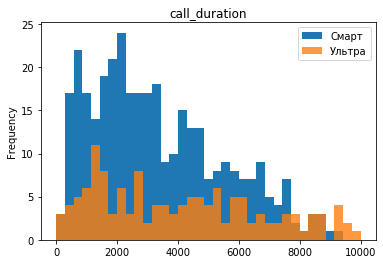

Максимальное значение: 10943


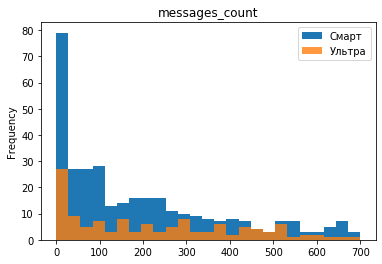

Максимальное значение: 1092


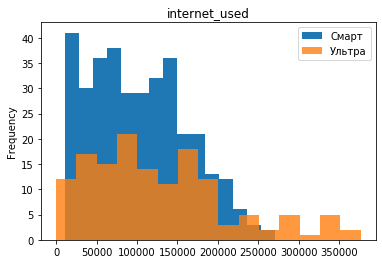

Максимальное значение: 271269


In [57]:
def print_hists(df, columns, bins, ranges):
    """"""
    for i in range(0, len(columns)):
        df[df['tariff_id'] == 0][columns[i]].plot(kind='hist', bins=bins[i], range=ranges[i], title=columns[i])
        df[df['tariff_id'] == 1][columns[i]].plot(kind='hist', bins=bins[i], range=ranges[i], alpha=.8)
        plt.legend(['Смарт', 'Ультра'])
        plt.show()
        print (f"Максимальное значение: {df[df['tariff_id'] == 0][columns[i]].max()}")

print_hists(
    total_statistic, 
    [
        'call_duration',
        'messages_count',
        'internet_used',
    ],
    [
        35,
        25,
        15,
    ],
    [
        (0, 10000),
        (0, 700),
        None
    ]
)


Все графики похожи на распределение Пуассона.

Продолжительность вызовов:
- В среднем пользователи тарифа "Смарт" выговаривают за год от 200, до 3500 минут. Учитывая, что в тариф  включено 500 минут ежемесячно, пользователи практически не превышают месячный лимит.
- В среднем большинство пользователей тарифа "Ультра" выговаривают за год от 1800 либо 5000 минут. Распределение среди этой категории более-менее равномерное, можно сделать вывод, что пользователям тарифа подходит их количество минут.

Количество отправленных сообщений:
_Я бы не удивился, если бы было везде 0. Все сидят в мессенджерах._
- В среднем пользователи тарифа "Старт" не пользуются СМСками, а те, кто пользуются - отправляют не более 100 в год.
- В среднем пользователи тарифа "Ультра" так же не пользуются СМСками. Учитывая их месячный лимит (1000смс) особенно интересно смотреть на распределение, где видно, что они отправляют меньше смс, чем пользователи тарифа "Смарт"

Количество израсходованного интернет - трафика:
- В среднем пользователи тарифа "Смарт" используют от 50 до 150 тысяч мб. Это 12 ГБ ежемесячно. (150000 / 1024 / 12). Однако, видимо, что у многих пользователей потребление трафика выбивается за лимит, но не сильно. (200000/1024/12) - 16 ГБ ежемесячно. Т.е. стандартного тарифа на 15ГБ не многим хватает.
- В среднем пользователям тарифа "Ультра" так же используют от 12ГБ до 16 ГБ ежемесячно. А как же 30ГБ в тарифе? Куда деваются? - Без понятия. Видимо, лучше распределить остатки интернета между пользователями тарифа "Старт". Фабрики - рабочим. Землю - крестьянам. Интернет - пользователям тарифа "Смарт".


#### Посчитаем статистические данные.


In [67]:
tariff1_condition = total_statistic['tariff_id'] == 0
tariff2_condition = total_statistic['tariff_id'] == 1

def get_statistic_data(df, column_name, tariff_name, describe):
    """Расчет статистичеких даннных для полученного датасета"""
    print(f"\nРасчет значений тарифа \"{tariff_name}\" для столбца \"{column_name}\": ")
    mean = df[column_name].mean()
    variance = np.var(df[column_name])
    standart_dev = np.sqrt(variance)

    print (f"Среднее: {mean:.2f}")
    print (f"Дисперсия: {variance:.2f}")
    print (f"Стандратное отклонение: {standart_dev:.2f}")

    bottom_line = mean - (standart_dev * 3)
    top_line = mean + (standart_dev * 3)
    bottom_line = bottom_line if (bottom_line > 0) else 0

    print (f"\nДля пользователей тарифа \"{tariff_name}\" нужно минимум {bottom_line} и максимум {top_line:.0f} {describe} в год\n")
    
get_statistic_data(total_statistic[tariff1_condition], 'call_duration', "Старт", "звонков")
get_statistic_data(total_statistic[tariff2_condition], 'call_duration', "Ультра", "звонков")
get_statistic_data(total_statistic[tariff1_condition], 'messages_count', "Старт", "сообщений")
get_statistic_data(total_statistic[tariff2_condition], 'messages_count', "Ультра", "сообщений")
get_statistic_data(total_statistic[tariff1_condition], 'internet_used', "Старт", "MB")
get_statistic_data(total_statistic[tariff2_condition], 'internet_used', "Ультра", "MB")



Расчет значений тарифа "Старт" для столбца "call_duration": 
Среднее: 3357.82
Дисперсия: 4818192.62
Стандратное отклонение: 2195.04

Для пользователей тарифа "Старт" нужно минимум 0 и максимум 9943 звонков в год


Расчет значений тарифа "Ультра" для столбца "call_duration": 
Среднее: 4540.08
Дисперсия: 10872134.14
Стандратное отклонение: 3297.29

Для пользователей тарифа "Ультра" нужно минимум 0 и максимум 14432 звонков в год


Расчет значений тарифа "Старт" для столбца "messages_count": 
Среднее: 212.86
Дисперсия: 49836.38
Стандратное отклонение: 223.24

Для пользователей тарифа "Старт" нужно минимум 0 и максимум 883 сообщений в год


Расчет значений тарифа "Ультра" для столбца "messages_count": 
Среднее: 326.09
Дисперсия: 108354.92
Стандратное отклонение: 329.17

Для пользователей тарифа "Ультра" нужно минимум 0 и максимум 1314 сообщений в год


Расчет значений тарифа "Старт" для столбца "internet_used": 
Среднее: 103415.81
Дисперсия: 3631160823.39
Стандратное отклонение: 60259.11



#### Вывод:<br>
Исходя из статистических данных, разброс действительно небольшой и в целом пользователям их тариф подходит... везде, кроме интернета - разброс даже для года получился заоблочно высоким. Надо что-то делать с тарифом, либо добавлять больше тарифов богу тарифов.

---
## Комментарий от наставника

Статистические параметры подсчитаны верно. Также сделан правильный вывод, молодец.
    
---

<font color="green">Урааааааа</font>

### Шаг 4. Проверка гипотез

Для решения этой задачи будем использовать формулирование гипотез о равенстве средних двух генеральных совокупностей. Такие гипотезы проверяются с помощью инди-теста, который реализован в библиотеке "stats" с помощью метода "ttest_ind()"<br>Критический уровень статистической значимости "alpha" зададим станадртно, как .05 и будем сравнивать с ним p-value

Гипотеза 1:
- нулевая гипотеза:
    - Средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различается
- альтернативная гипотеза:
    - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

---
## Комментарий от наставника

Нулевая гипотеза формируется всегда так, что один показатель равен другому. То есть при изменении тарифа выручка не изменится. Исправь данный момент.
    
---

<font color="green">Исправлено</font>

In [68]:
alpha = .05

results = st.ttest_ind(
    total_statistic[tariff1_condition]['revenue'],
    total_statistic[tariff2_condition]['revenue']
)

print ('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print ('\nОтвергаем гипотезу.')
else:
    print ('\nГипотеза прошла проверку.')
    

p-значение: 6.116633148807138e-05

Отвергаем гипотезу.


---
## Комментарий от наставника

pvalue должно быть меньше alpha, чтобы мы отбросили 0-ую гипотезу. Проверка на равенство тут ни к чему.
    
---

<font color="green">Исправлено</font>

---
## Комментарий от наставника

Мы должны были сгруппировать доход по пользователям, а не по месяцам. Иначе ты проверяешь другую гипотезу: различие выручки от тарифов по месяцам. Исправь сводную таблицу, в ней надо сгруппировать по пользователям доход, и проверяй нужную нам гипотезу.
    
---

<font color="green">Исправлено</font>

Вывод:
Действительно, выручка от тарифов пользователей различаются.<br>
<br >

Гипотеза 2:
- нулевая гипотеза:
    - Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
- альтернативная гипотеза:
    - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

---
## Комментарий от наставника

Нулевая гипотеза формируется всегда так, что один показатель равен другому. То есть выручка от пользователей из разных регионов одинакова. Исправь данный момент.
    
---

In [80]:
def get_and_describe_pvalue(df, column_search, condition, column_test):
    """Проверка гипотез с описанием полученного значения"""
    condition1 = df.query(f'{column_search} == @condition')
    condition2 = df.query(f'{column_search} != @condition')

    alpha = .05

    results = st.ttest_ind(
        condition1[column_test],
        condition2[column_test]
    )

    print ('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print (f'\nОтвергаем гипотезу.')
    else:        
        print (f'\nГипотеза прошла проверку.')

get_and_describe_pvalue(total_statistic, 'city', 'Москва', 'revenue')


p-значение: 0.9917437048645248

Гипотеза прошла проверку.


Средняя выручка пользователей из Москвы и регионов не различаются.<br>
Так, как p-value стремится к 1, можно сделать вывод, что средняя выручка не просто не различается, а вообще одинаковая.

В рамках данной работы появилась третья гипотеза - пользователи тарифа "Смарт" чаще переплачивают за свой тариф, чем пользователи тарифа "Ультра":
    
Гипотеза 3:
- нулевая гипотеза:
    - Пользователи тарифов "Смарт" и "Ультра" переплачивают за тариф в одинаковом соотношении.
- альтернативная гипотеза:
    - Пользователи тарифа "Смарт" и "Ультра" переплачивают за тариф в разном соотношении.

In [81]:
get_and_describe_pvalue(total_statistic, 'tariff_id', 0, 'overpay')


p-значение: 2.2891677552003534e-06

Отвергаем гипотезу.


Действительно, одни переплачивают за тариф намного чаще, чем другие. Давайте узнаем кто именно:

In [82]:
total_statistic[tariff1_condition]['overpay'].count() > total_statistic[tariff2_condition]['overpay'].count()


True

Все, что мы думали подтвердилось - пользователи тарифа "Старт" переплачивают за свой тариф намного чаще, чем пользователи тарифа "Ультра"

Посчитаем общую выручку по тарифам:

In [85]:
print(total_statistic[tariff1_condition]['revenue'].count())
print(total_statistic[tariff2_condition]['revenue'].count())

349
143


Тарифом "Старт" пользуются больше, чем тарифом "Ультра".

In [92]:
revenue_tariff1 = total_statistic[tariff1_condition]['revenue'].sum()
revenue_tariff2 = total_statistic[tariff2_condition]['revenue'].sum()

print (f'Выручка за год, тариф "Смарт": {revenue_tariff1}')
print (f'Выручка за год, тариф "Ультра": {revenue_tariff2}')

       
if revenue_tariff1 > revenue_tariff2:
    overpay_percent = revenue_tariff1 / revenue_tariff2 * 100 - 100
    print (f'Пользователи тарифа "Смарт" принесли на {overpay_percent:.2f}% больше прибыли.')
else:
    overpay_percent = revenue_tariff2 / revenue_tariff1 * 100 - 100
    print (f'Пользователи тарифа "Ультра" принесли на {overpay_percent:.2f}% больше прибыли.')
       

Выручка за год, тариф "Смарт": 417581
Выручка за год, тариф "Ультра": 281250
Пользователи тарифа "Смарт" принесли на 48.47% больше прибыли.


---
## Комментарий от наставника

Во-первых, мы опять проверяем не то, что надо. Нужна группировка по клиентам, а не по месяцам. Исправь данный момент. Во-вторых, функция хорошая, но в задании не сказано проверять тарифы во второй гипотезе. Надо дать вывод суммарно по 2 тарифам и разным городам. В третьих, выводы неверны, поскольку неверны написанные выше гипотезы. Если pvalue больше alpha, то мы не может отбросить нулевыю гипотезу. Вспомни, как она должна формулироваться. То есть выручки от Москвы и регионов одинаковы.
    
---

<font color="green">Исправлено</font>

### Общий вывод:

В данной работе исследованы тарифы и поведение пользователей, чтобы понять - какой тариф принесет больше денег.

1. Проанализированы полученные таблицы, обнаружен фронт работ по замене типов данных и заполнению пропусков.
2. Произведена предобработка данных, все столбцы в таблицах приведены к нужным типам, пропуски заполнены.
3. Проанализированы:
    1. Количество звонков и минут разговора пользователей.
    2. Количество отправляемых сообщений пользователей.
    3. Количество потребялемого интернет трафика.
    
    Выводы по 3 пункту:
    1. Пользователи тарифа "Старт" если и превышают свой пакет звонков, то не на много.
    2. Пользователям тарифа "Старт" хватает сообщений.
    3. Пользователям тарифа старт НЕ хватает интернет-трафика.
    
    1. Пользователи тарифа "Ультра" НЕ превышают свой пакет звонков.
    2. Пользователи тарифа "Ультра" практически не используют огромный лимит сообщений.
    3. Пользователи тарифа "Ультра" потребляют примерно столько же интернет трафика, сколько и пользователи тарифа "Старт", не превышая его.
4. Протестированы 2 основные гипотезы:
    1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различается.
        1. Гипотеза НЕ прошла проверку. Выручки от тарифов различаются.
    3. Средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.
        1. Гипотеза прошла проверку. Средние выручки равны.
5. Протестирована 1 дополнительная гипотеза:
    1. Пользователи тарифов "Смарт" и "Ультра" переплачивают за тариф в одинаковом соотношении.
        1. Гипотеза НЕ прошла проверку. Пользователи тарифа "Старт" переплачивают за свой тариф чаще, чем пользователи тарифа "Ультра".
6. Проверили, пользователи какого тарифа принесли больше прибыли:
    1. Пользователей тарифа "Старт" больше, чем пользователей тарифа "Ультра".
    2. Пользователи тарифа "Старт" приносят больше прибыли, чем пользователи тарифа "Ультра".

        
#### Итого:
За 2018 год, пользователи тарифа "Старт" принесли на 48.47% больше прибыли, чем пользователи тарифа "Ультра".

Чтобы поднять выручку, можно:
- Часть пользователей тарифа "Смарт" пересадить на тариф "Ультра", заманив плюшкам; 
- Опустить планку трафика еще ниже, чтобы насильно пересадить на "Ультра";
- Ввести новый тариф, где будет меньше смс но больше интернет трафика;
- Разрешать докупать трафик не по мере использования, а пакетами по 5 ГБ.


---
## Комментарий от наставника

Выводы описаны грамотно. Приведен план дальнейших действий компании. В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано и какими методами. Исправь последний шаг проекта и, при необходимости, исправь выводы.

---

<font color="green">Исправлено</font>

## Комментарий от наставника

- Вначале работы следует описывать данные с которыми работаешь;
- Если еще не встречался с библиотекой seaborn, то изучи ее. Можно строить презентабельные графики с ее помощью;
- Исправь статистический анализ, там много помарок;
- Описывай свои мысли и действия.

Ты проделал большую работу, молодец! Исправь последний шаг и получится хорошая работа :)

-----

<font color="green">Исправлено по максимуму. Библиотеку seaborn изучу. Спасибо за комментарии :)</font>

<font color=blue> Обязательная часть работы теперь сделана правильно, получены верные результаты и написаны грамотные выводы. Молодец. Здорово, что тема увлекла и высказана и проверена дополнительная гипотеза, это радует. Продолжай в том же духе, успехов в дальнейших проектах :)
    
---